**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [2]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Preprocessing

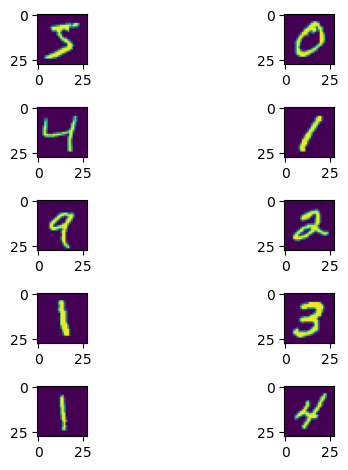

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
plt.tight_layout()
plt.show()

# Build CNN Model

Epoch 1/2
938/938 [==============================] - 9s 9ms/step - loss: 2.3016 - accuracy: 0.1114 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/2
938/938 [==============================] - 8s 9ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3013 - val_accuracy: 0.1135
Adam - Test accuracy: 0.1135
Epoch 1/2
938/938 [==============================] - 8s 8ms/step - loss: 2.3014 - accuracy: 0.1122 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/2
938/938 [==============================] - 7s 8ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
SGD - Test accuracy: 0.1135
Epoch 1/2
938/938 [==============================] - 8s 8ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/2
938/938 [==============================] - 8s 8ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
RMSprop - Test accuracy: 0.1135


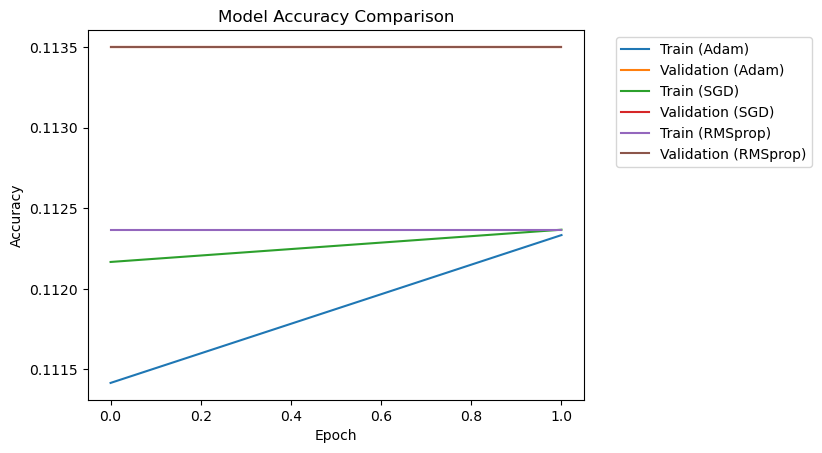

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
x_train /= 255
x_test /=255
batch_size = 64
num_classes = 10
epochs = 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #Initialize model here


'''
Define batch size of 64 , 
No of classes (interpret from data)
Train for 2 epochs on every model

'''

def build_model(optimizer): 

  '''
  Define a sequential model with categorical cross entropy as loss function consisting
  2 convolution and 2 pooling layers with relu as activation function followed by
  droput -> flatten -> dense -> dropout -> dense

  Convolution layer - (kernel size = (3*3))
  Pooling layer - (pool size = (2*2))

  '''
  model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  #****** INSERT MODEL CODE HERE ******

  return model 

#**** Define Optimizers and build model and caluclate accuracy for each one of them  ****
accuracy_results = {}

# Optimizers to test (legacy optimizers)
optimizers = [Adam(), SGD(), RMSprop()]

# Train and evaluate models for each optimizer
for optimizer in optimizers:
    model = build_model(optimizer)
    
    # Train the model
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    
    # Evaluate and print test accuracy
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f'{optimizer.__class__.__name__} - Test accuracy: {score[1]:.4f}')
    
    # Plot training and validation accuracy
    plt.plot(hist.history['accuracy'], label=f'Train ({optimizer.__class__.__name__})')
    plt.plot(hist.history['val_accuracy'], label=f'Validation ({optimizer.__class__.__name__})')

# Display the accuracy plot
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()



# Predict Image

/Users/amanmehra/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 63ms/step
Predicted Class: 1


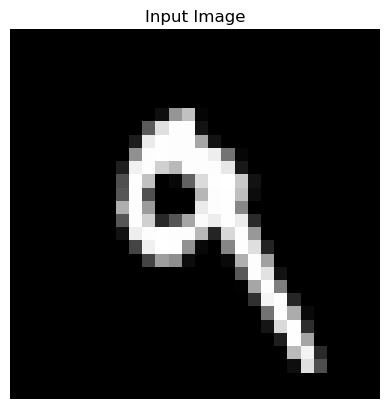

In [14]:
from tensorflow.keras.models import load_model

# Save the model
model.save("mnistc.h5", save_format="h5")

def predict_image(model, img):
    '''
    Reshape the image into (1, 28, 28, 1), predict the class,
    and print the predicted label.
    '''
    img_reshaped = img.reshape(1, 28, 28, 1)  # Reshape for prediction
    prediction = model.predict(img_reshaped)
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    print(f'Predicted Class: {predicted_class}')

# Load the saved model
m = load_model('mnistc.h5')

# Predict and display the image
predict_image(m, x_test[7])
plt.imshow(x_test[7].reshape(28, 28), cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()